In [1]:
# magic function
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
# libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
import io
import warnings
import pandas_profiling as pp
from pandas_profiling import ProfileReport
warnings.filterwarnings(action = "ignore",category=FutureWarning)
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix, roc_curve, roc_auc_score, r2_score
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.min_rows',None)
pd.set_option('display.expand_frame_repr',True)

In [42]:
from google.colab import files
uploaded = files.upload()

Saving price_data.csv to price_data.csv


In [36]:
# date_cols=['date_activ','date_end','date_modif_prod','date_renewal']
train = pd.read_csv('/content/train.csv')
train.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,pow_max,churn,tenure,months_activ,months_to_end,months_modif_prod,months_renewal,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_sdd,channel_usi,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_nul,origin_usa,activity_apd,activity_ckf,activity_clu,activity_cwo,activity_fmw,activity_kkk,activity_kwu,activity_sfi,activity_wxe
0,48ada52261e7cf58715202705a0451c9,5.490346,0.000000,4.001128,4.423595,0.0,2.556652,0.095919,0.088347,58.995952,0,2.920541,41.76,41.76,1,200.381006,18.402912,stayed,3,37.0,10,37.0,1.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,24011ae4ebbe3035111d65fa7c15bc57,4.325649,4.739944,0.000000,3.084341,0.0,0.444045,0.114481,0.098142,40.606701,1,0.000000,25.44,25.44,2,678.990000,43.648000,churned,3,30.0,5,2.0,6.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,0,0.000000,16.38,16.38,1,18.890000,13.800000,stayed,7,76.0,7,76.0,4.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,0,0.000000,28.60,28.60,1,6.600000,13.856000,stayed,6,68.0,3,68.0,8.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,0,0.000000,30.22,30.22,1,25.460000,13.200000,stayed,6,69.0,2,69.0,9.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
history_data  = pd.read_csv('/content/history.csv')
history_data.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,01-01-2015,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,02-01-2015,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,03-01-2015,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,04-01-2015,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,05-01-2015,0.149626,0.0,0.0,44.266931,0.0,0.0


In [23]:
mean_year = history_data.groupby(["id"]).mean().reset_index()
mean_year.head()

,id,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000


In [24]:
mean_6m = history_data[history_data["price_date"] > "2015-06-01"].groupby(["id"]).mean().reset_index()
mean_6m

,id,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix


In [25]:
mean_3m=history_data[history_data['price_date']>'2015-10-01'].groupby(['id']).mean().reset_index()
mean_3m

,id,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix


In [26]:
#Combine the mean year in a single dataframe
mean_year=mean_year.rename(index=str,columns={'price_p1_var':'mean_year_price_p1_var',
                                              'price_p2_var':'mean_year_price_p2_var',
                                              'price_p3_var':'mean_year_price_p3_var',
                                              'price_p1_fix':'mean_year_price_p1_fix',
                                              'price_p2_fix':'mean_year_price_p2_fix',
                                              'price_p3_fix':'mean_year_price_p3_fix',})
mean_year['mean_year_price_p1']=mean_year['mean_year_price_p1_var']+mean_year['mean_year_price_p1_fix']
mean_year['mean_year_price_p2']=mean_year['mean_year_price_p2_var']+mean_year['mean_year_price_p2_fix']
mean_year['mean_year_price_p3']=mean_year['mean_year_price_p3_var']+mean_year['mean_year_price_p3_fix']

In [27]:
mean_6m=mean_6m.rename(index=str,columns={'price_p1_var':'mean_6m_price_p1_var',
                                              'price_p2_var':'mean_6m_price_p2_var',
                                              'price_p3_var':'mean_6m_price_p3_var',
                                              'price_p1_fix':'mean_6m_price_p1_fix',
                                              'price_p2_fix':'mean_6m_price_p2_fix',
                                              'price_p3_fix':'mean_6m_price_p3_fix',})
mean_6m['mean_6m_price_p1']=mean_6m['mean_6m_price_p1_var']+mean_6m['mean_6m_price_p1_fix']
mean_6m['mean_6m_price_p2']=mean_6m['mean_6m_price_p2_var']+mean_6m['mean_6m_price_p2_fix']
mean_6m['mean_6m_price_p3']=mean_6m['mean_6m_price_p3_var']+mean_6m['mean_6m_price_p3_fix']

In [28]:
mean_3m=mean_3m.rename(index=str,columns={'price_p1_var':'mean_3m_price_p1_var',
                                              'price_p2_var':'mean_3m_price_p2_var',
                                              'price_p3_var':'mean_3m_price_p3_var',
                                              'price_p1_fix':'mean_3m_price_p1_fix',
                                              'price_p2_fix':'mean_3m_price_p2_fix',
                                              'price_p3_fix':'mean_3m_price_p3_fix',})
mean_3m['mean_3m_price_p1']=mean_3m['mean_3m_price_p1_var']+mean_3m['mean_3m_price_p1_fix']
mean_3m['mean_3m_price_p2']=mean_3m['mean_3m_price_p2_var']+mean_3m['mean_3m_price_p2_fix']
mean_3m['mean_3m_price_p3']=mean_3m['mean_3m_price_p3_var']+mean_3m['mean_3m_price_p3_fix']

In [29]:
history_new = pd.merge(mean_year,mean_6m, on='id',how='left')
history_new = pd.merge(mean_year,mean_3m, on='id',how='left')
history_new.head()

,id,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
train.columns

Index(['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'forecast_cons_12m', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_p1',
       'forecast_price_energy_p2', 'forecast_price_pow_p1', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'pow_max', 'churn', 'tenure', 'months_activ',
       'months_to_end', 'months_modif_prod', 'months_renewal', 'channel_epu',
       'channel_ewp', 'channel_fix', 'channel_foo', 'channel_lmk',
       'channel_sdd', 'channel_usi', 'origin_ewx', 'origin_kam', 'origin_ldk',
       'origin_lxi', 'origin_nul', 'origin_usa', 'activity_apd',
       'activity_ckf', 'activity_clu', 'activity_cwo', 'activity_fmw',
       'activity_kkk', 'activity_kwu', 'activity_sfi', 'activity_wxe'],
      dtype='object')

In [37]:
def plot_churn_by_month(dataframe, column, fontsize_=11):
  temp = dataframe[[column, "churn", "id"]].groupby([column, "churn"])["id"].count().unstack(level=1)
  temp.plot(kind="bar",
  figsize=(18,10),
  stacked=True,
  rot=0,
  title= column)
  # Rename legend
  plt.legend(["Retention", "Churn"], loc="upper right")
  # Labels
  plt.ylabel("No. of companies")
  plt.xlabel("No. of months")
  # Set xlabel fontsize
  plt.xticks(fontsize=fontsize_)
  plt.show()

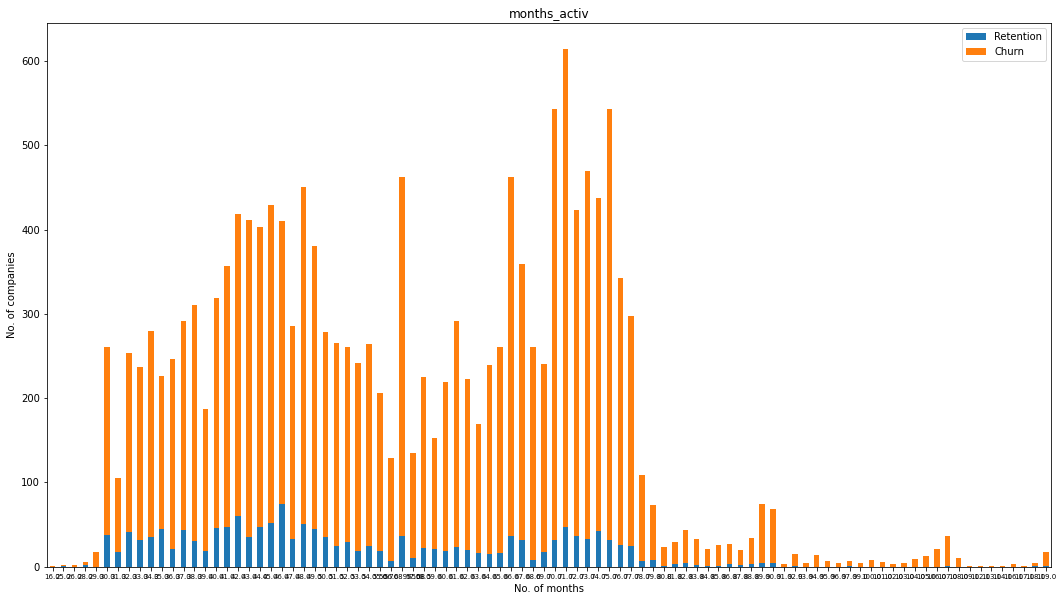

In [38]:
plot_churn_by_month(train, "months_activ", 7)

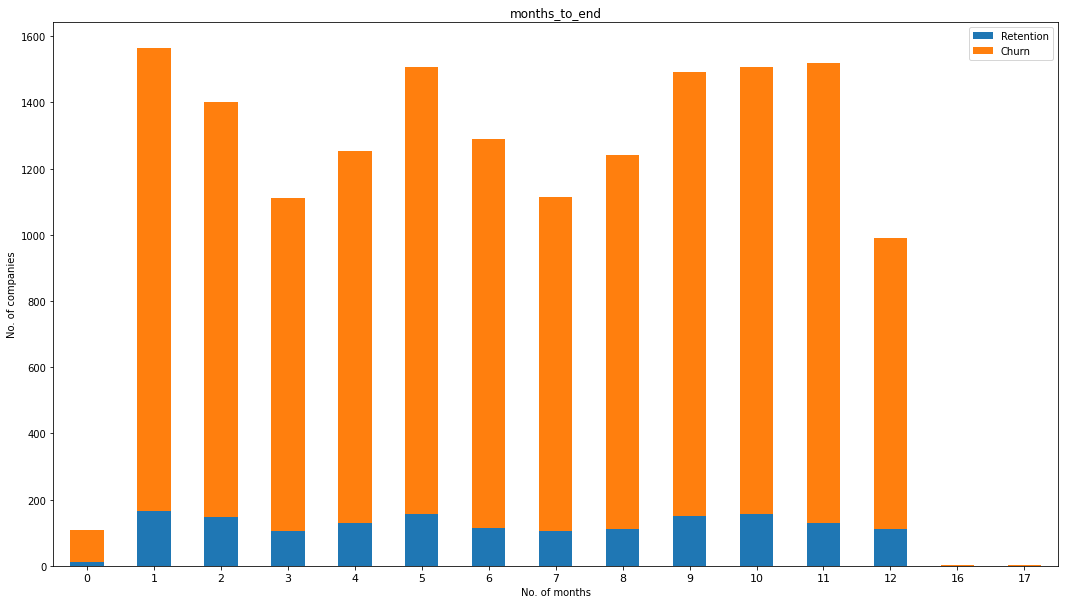

In [39]:
plot_churn_by_month(train, "months_to_end")


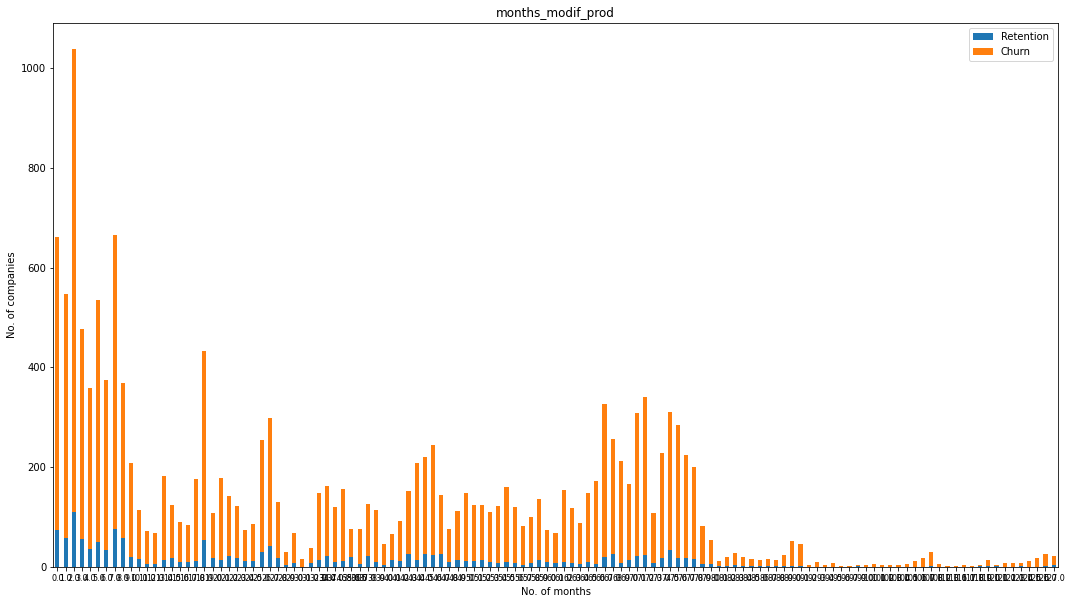

In [40]:
plot_churn_by_month(train, "months_modif_prod", 8)

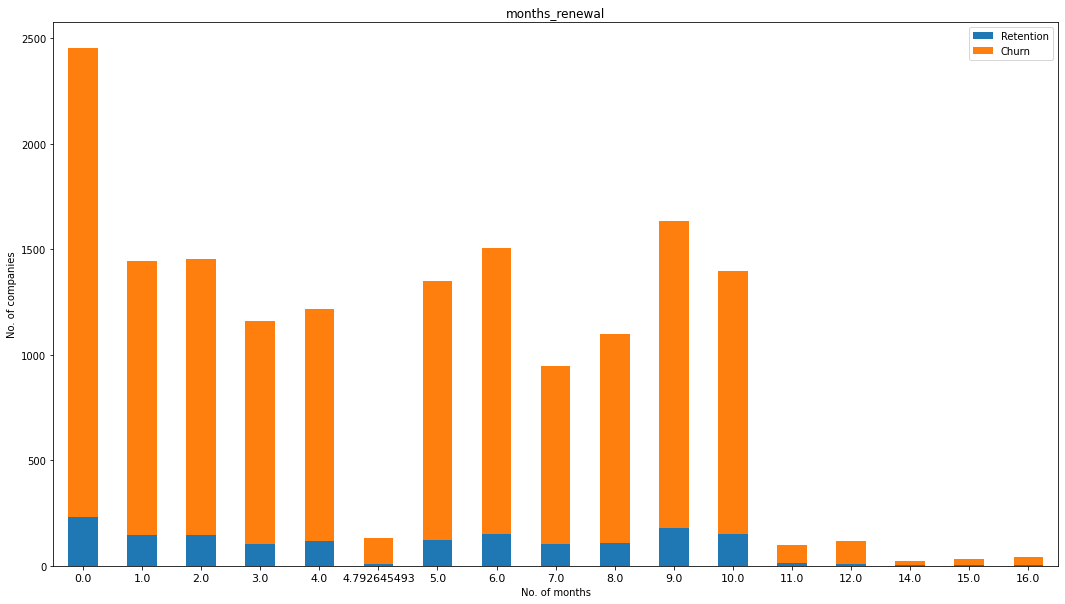

In [41]:
plot_churn_by_month(train, "months_renewal")


In [43]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"],format='%Y-%m-%d')
price_df.head()


,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [44]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()
# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()
# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1','price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'),on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] -diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] -diff['price_off_peak_fix']
diff = diff[['id','offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()


,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001
